# Релизуйте свой классификатор KNN

### Импорты

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

### Реализуйте класс MyKNeighborsClassifier (6 баллов)

1. (3 балла) Реализован класс с параметрами по умолчанию
2. (1 балл) Реализовано манхетенское расстояние `(metric='manhattan')`
3. (2 балла) Реализованы веса, зависящие от растояния `(weights='distance')`



In [ ]:
class MyKNeighborsClassifier:
  def __init__(self, n_neighbours: int = 5, weights: str = "uniform", metric: str = "euclidean"):
    if metric not in ["manhattan", "euclidean"]:
      raise ValueError("This type of metric is not supported: {}".format(metric))
    if weights not in ["uniform", "distance"]:
      raise ValueError("This type of weights is not supported: {}".format(weights))
    if n_neighbours == 0: # не даем пользователю ввести 0 соседей
      raise ValueError("Expected n_neighbors > 0. Got 0")
    
    self.n_neighbours = n_neighbours
    self.weights = weights
    self.metric = metric

    self.X = None
    self.y = None

  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    self.train_set = X
    self.train_class = y

  def predict(self, X: np.ndarray) -> np.ndarray:
    result_list = [] # список, в который будут заноситься предсказанные моделью классы
    for point in X: # для каждой точки тестовой выборки делаем следующее:
      if self.metric == 'manhattan':
        testData = [[self.dist_m(point, self.train_set[i]), int(self.train_class[i])] for i in range(len(self.train_set))] # Создаем список формата [euclidean_distance, class] для каждой точки тренировочной выборки
      elif self.metric == 'euclidean':
        testData = [[self.dist_e(point, self.train_set[i]), int(self.train_class[i])] for i in range(len(self.train_set))] # Создаем список формата [manhattan_distance, class] для каждой точки тренировочной выборки
      class_counter = np.zeros(len(np.unique(self.train_class)), dtype='float') # создаем массив из нулей, размер которого совпадает с количеством классов
      if self.weights == 'uniform':
        for elem in sorted(testData)[0:self.n_neighbours]:
          class_counter[elem[1]] += 1 # инкрементируем элемент массива, порядковый номер которого совпадает с классом очередного "соседа"
      elif self.weights == 'distance':
        for elem in sorted(testData)[0:self.n_neighbours]:
          class_counter[elem[1]] += 1/elem[0] # записываем вес "соседа" в элемент массива, порядковый номер которого совпадает с классом этого очередного "соседа"
      result = sorted(zip(class_counter, range(len(np.unique(self.train_class)))), reverse=True) # кортеж формата [(weignt_class_0, class_0), (weight_class_1, class_1), ...], отсортированный по убыванию weight_class
      if result[0][0] == result[1][0]: # при одинаковых максимальных весах (количестве) выбирается тот класс, порядковый номер которого меньше.
        result_list.append(result[1][1])
      else:
        result_list.append(result[0][1])
      result_array = np.ndarray(shape=(len(result_list), 1), dtype=int, buffer=np.array(result_list)) # создаем массив из списка
    return result_array

  def dist_e(self, a, b): # вычисление евклидова расстояния
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** 0.5
  
  def dist_m(self, a, b): # вычисление манхэттенского расстояния
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

In [ ]:
### Тестовый датасет на проверку работоспособности модели
X_train_start = np.ndarray(shape=(5, 2), dtype=int, buffer=np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5]]))
y_train_start = np.ndarray(shape=(5, 1), dtype=int, buffer=np.array([0, 1, 1, 0, 1]))
T = np.ndarray(shape=(2, 2), dtype=int, buffer=np.array([[2, 3], [3, 3]]))

knn_start = MyKNeighborsClassifier(n_neighbours=3, weights="uniform", metric="euclidean")
knn_start.fit(X_train_start, y_train_start)
y_pred_start = knn_start.predict(T)
y_pred_start

array([[1],
       [1]])

In [ ]:
def MyAccuracyScore (y_true, y_pred): # описание своего вычислителя доли правильных ответов
  return sum([int(y_pred[i]==y_true[i]) for i in range(len(y_true))]) / float(len(y_true))

### Проверьте решение на датасете и сравните с kNeighborsClassifier из sklearn (4 балла)
1. (1 балл) Выведите accuracy_score для вашего решения и для решения из sklearn, посчитайте в 4 вариациях (Должно получиться 8 чисел)
  1. Параметры по умолчанию
  2. `weights='distance'`
  3. `metric='manhattan'`
  4. `weights='distance'`, `metric='manhattan'`
2. (2 балла) Переберите параметр k от 1 до 10 для каждой модели из пункта выше (получится 4 графика по две линии на каждом)
  1. Переберите параметр, каждый раз обучайте модель
  2. Выведите график зависимости `accuracy` от `k`
  3. На этом же графике выведите пунктирной линией такую же зависимость для модели из sklearn
3. (3 балла) Напишите вывод, сравнение всего, что получилось – получилось ли у вас достичь таких же результатов, как в sklearn, как на результат влияют параметры, какая модель и с какими параметрами оказалась лучшей.



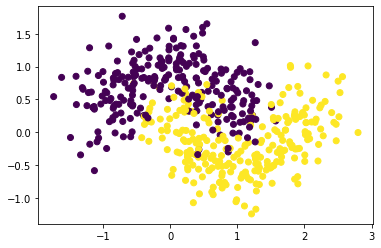

In [ ]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Выведите accuracy_score для вашего решения и для решения из sklearn, посчитайте в 4 вариациях (Должно получиться 8 чисел)

In [ ]:
### Параметры по умолчанию - Свой классификатор
knn = MyKNeighborsClassifier(n_neighbours=6, weights="uniform", metric="euclidean")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.87

In [ ]:
### Параметры по умолчанию - классификатор Sklearn
knn = KNeighborsClassifier(n_neighbors=6, weights='uniform', metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.87

In [ ]:
### Манхэттенское расстояние - Свой классификатор
knn = MyKNeighborsClassifier(n_neighbours=6, weights="uniform", metric="manhattan")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.86

In [ ]:
### Манхэттенское расстояние - классификатор Sklearn
knn = KNeighborsClassifier(n_neighbors=6, weights='uniform', metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.86

In [ ]:
### Веса, зависящие от расстояния - Свой классификатор
knn = MyKNeighborsClassifier(n_neighbours=6, weights="distance", metric="euclidean")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

In [ ]:
### Веса, зависящие от расстояния - классификатор Sklearn
knn = KNeighborsClassifier(n_neighbors=6, weights='distance', metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

In [ ]:
### Веса, зависящие от расстояния + Манхэттенское расстояние - Свой классификатор
knn = MyKNeighborsClassifier(n_neighbours=6, weights="distance", metric="manhattan")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.87

In [ ]:
### Веса, зависящие от расстояния + Манхэттенское расстояние - классификатор Sklearn
knn = KNeighborsClassifier(n_neighbors=6, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.87

2. Переберите параметр k от 1 до 10 для каждой модели из пункта выше (получится 4 графика по две линии на каждом)

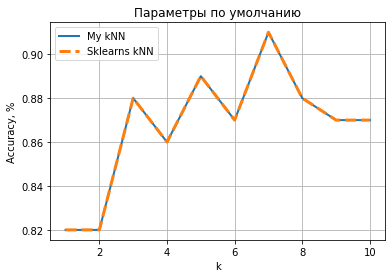

In [ ]:
Accuracy_list = []
for k in range(1, 11):
  knn = MyKNeighborsClassifier(n_neighbours=k, weights="uniform", metric="euclidean")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  Accuracy_list.append(MyAccuracyScore(y_test, y_pred))


Accuracy_list_sklearn = []
for k in range(1, 11):
  knn_sklearn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
  knn_sklearn.fit(X_train, y_train)
  y_pred_sklearn = knn_sklearn.predict(X_test)
  Accuracy_list_sklearn.append(accuracy_score(y_test, y_pred_sklearn))

fig, ax = plt.subplots()
ax.plot(range(1, 11), Accuracy_list, '-', label='My kNN', linewidth=2)
ax.plot(range(1, 11), Accuracy_list_sklearn, '--', label='Sklearns kNN', linewidth=3)
ax.legend()

plt.title('Параметры по умолчанию')
plt.grid()
plt.xlabel('k')
plt.ylabel('Accuracy, %')
plt.show()

In [ ]:
max(Accuracy_list_sklearn)

0.91

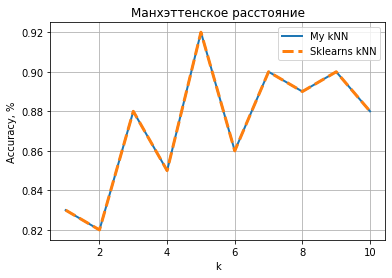

In [ ]:
Accuracy_list = []
for k in range(1, 11):
  knn = MyKNeighborsClassifier(n_neighbours=k, weights="uniform", metric="manhattan")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  Accuracy_list.append(MyAccuracyScore(y_test, y_pred))

Accuracy_list_sklearn = []
for k in range(1, 11):
  knn_sklearn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='manhattan')
  knn_sklearn.fit(X_train, y_train)
  y_pred_sklearn = knn_sklearn.predict(X_test)
  Accuracy_list_sklearn.append(accuracy_score(y_test, y_pred_sklearn))

fig, ax = plt.subplots()
ax.plot(range(1, 11), Accuracy_list, '-', label='My kNN', linewidth=2)
ax.plot(range(1, 11), Accuracy_list_sklearn, '--', label='Sklearns kNN', linewidth=3)
ax.legend()

plt.title('Манхэттенское расстояние')
plt.grid()
plt.xlabel('k')
plt.ylabel('Accuracy, %')
plt.show()

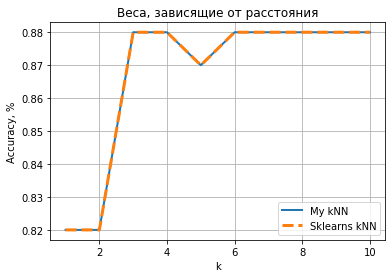

In [ ]:
Accuracy_list = []
for k in range(1, 11):
  knn = MyKNeighborsClassifier(n_neighbours=k, weights="distance", metric="euclidean")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  Accuracy_list.append(MyAccuracyScore(y_test, y_pred))

Accuracy_list_sklearn = []
for k in range(1, 11):
  knn_sklearn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
  knn_sklearn.fit(X_train, y_train)
  y_pred_sklearn = knn_sklearn.predict(X_test)
  Accuracy_list_sklearn.append(accuracy_score(y_test, y_pred_sklearn))

fig, ax = plt.subplots()
ax.plot(range(1, 11), Accuracy_list, '-', label='My kNN', linewidth=2)
ax.plot(range(1, 11), Accuracy_list_sklearn, '--', label='Sklearns kNN', linewidth=3)
ax.legend()

plt.title('Веса, зависящие от расстояния')
plt.grid()
plt.xlabel('k')
plt.ylabel('Accuracy, %')
plt.show()

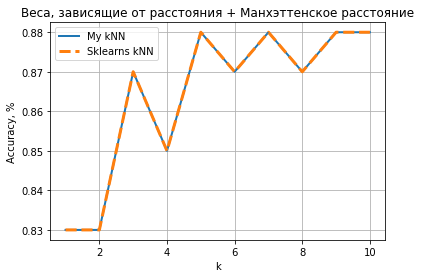

In [ ]:
Accuracy_list = []
for k in range(1, 11):
  knn = MyKNeighborsClassifier(n_neighbours=k, weights="distance", metric="manhattan")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  Accuracy_list.append(MyAccuracyScore(y_test, y_pred))

Accuracy_list_sklearn = []
for k in range(1, 11):
  knn_sklearn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
  knn_sklearn.fit(X_train, y_train)
  y_pred_sklearn = knn_sklearn.predict(X_test)
  Accuracy_list_sklearn.append(accuracy_score(y_test, y_pred_sklearn))

fig, ax = plt.subplots()
ax.plot(range(1, 11), Accuracy_list, '-', label='My kNN', linewidth=2)
ax.plot(range(1, 11), Accuracy_list_sklearn, '--', label='Sklearns kNN', linewidth=3)
ax.legend()

plt.title('Веса, зависящие от расстояния + Манхэттенское расстояние')
plt.grid()
plt.xlabel('k')
plt.ylabel('Accuracy, %')
plt.show()

3. Напишите вывод, сравнение всего, что получилось – получилось ли у вас достичь таких же результатов, как в sklearn, как на результат влияют параметры, какая модель и с какими параметрами оказалась лучшей.



  Были достигнуты результаты работы модели, аналогичные с результатами работы встроенной библиотечной модели. В результате работы было выяснено, что при использовании классификатора sklearn, при одинаковом максимальном количестве соседей, приоритет отдается классу с наименьшим порядковым номером.

  Например, если при k = 100 и 3 классах выяснилось, что было 40 соседей класса 0 и 40 соседей класса 1 (т.о., осталось 20 соседей класса 2), то модель определит это как класс 0, поскольку этот класс обладает меньшим порядковым номером ( 0 < 1).

  Для представленного набора данных наиболее эффективным оказалось использование модели с реализацией манхэттенского расстояния при k = 5. В данном случае, доля правильных ответов составила 0.92.

  Вторым по эффективности оказалось использование евклидова расстояния при k = 7. В данном случае, доля правильных ответов составила 0.91.

  Наиболее неэффективным классификатором выступили все вариации параметров при k < 3.

  Наиболее стабильные результаты показала модель с реализацией весов. при 7 из 10 значениях k модель показала одинаковые результаты, соответствующие доле правильных ответов в 0.88.